In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd  
from sklearn.preprocessing import  MinMaxScaler  

In [3]:
df = pd.read_csv('/home/iftekhar/Downloads/Logistic_regression_dataset.csv')
df.head()

,English,Math,Decision
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [42]:
def prepare_dataset(df):
    dataset = np.array(df)
    X = dataset[:, :-1]
    X =  MinMaxScaler(feature_range=(0, 1)).fit_transform(X)
    # stacking columns wth all ones in feature matrix 
    a = np.ones(X.shape[0]).reshape(-1,1)
    X = np.c_[a,X]
    y = dataset[:, -1] 
    return X, y

In [43]:
X, y = prepare_dataset(df)

In [53]:
print(X[:2], X.shape, "\n", y, "\n", np.where(y>0))

[[1.         0.06542784 0.69465488]
 [1.         0.00326632 0.19470455]] (100, 3) 
 [0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0.
 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1.] 
 (array([ 3,  4,  6,  7,  8,  9, 12, 13, 15, 16, 18, 19, 21, 24, 25, 26, 30,
       31, 33, 37, 40, 42, 46, 47, 48, 49, 50, 51, 52, 56, 58, 59, 60, 66,
       68, 69, 71, 72, 73, 74, 75, 76, 77, 80, 81, 82, 83, 84, 85, 87, 88,
       90, 91, 93, 94, 95, 96, 97, 98, 99]),)


In [48]:
# initial beta values 
beta = np.matrix(np.zeros(X.shape[1])) 
beta

matrix([[0., 0., 0.]])

/home/iftekhar/amiebot/experiment_env/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


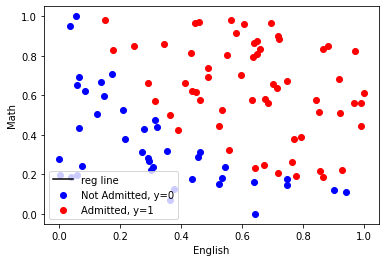

In [49]:
plot_reg(X, y, beta)

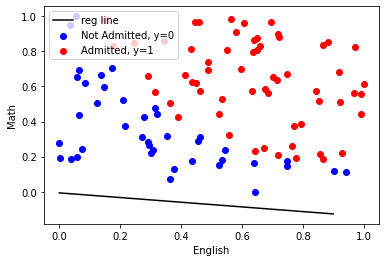

In [50]:
beta = np.matrix([[1, 20, 150]])
plot_reg(X, y, beta)

In [51]:
def pred_values(beta, X): 
    pred_prob = logistic_sigmoid_func(beta, X) 
    pred_value = np.where(pred_prob >= .5, 1, 0) 
    return np.squeeze(pred_value) 

In [52]:
pred_values(beta, X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [57]:
def log_gradient(beta, X, y): 
    ''' 
    logistic gradient function 
    '''
    first_calc = logistic_sigmoid_func(beta, X) - y.reshape(X.shape[0], -1) 
    final_calc = np.dot(first_calc.T, X) 
    return final_calc 
        
def cost_func(beta, X, y): 
    ''' 
    cost function, J 
    '''
    log_func_v = logistic_sigmoid_func(beta, X) 
    y = np.squeeze(y) 
    step1 = y * np.log(log_func_v) 
    step2 = (1 - y) * np.log(1 - log_func_v) 
    final = -step1 - step2 
    return np.mean(final) 
  
def grad_desc(X, y, beta, lr=.01, converge_change=.0001): 
    ''' 
    gradient descent function 
    '''
    cost = cost_func(beta, X, y)
    print('cost is: ', cost)
    change_cost = 1
    num_iter = 1
      
    while(change_cost > converge_change): 
        old_cost = cost 
        beta = beta - (lr * log_gradient(beta, X, y)) 
        cost = cost_func(beta, X, y) 
        change_cost = old_cost - cost 
        num_iter += 1
    return beta, num_iter  
  


In [58]:
# beta values after running gradient descent 
beta = np.matrix(np.zeros(X.shape[1])) 
beta, num_iter = grad_desc(X, y, beta) 


cost is:  69.31471805599453


In [59]:
# estimated beta values and number of iterations 
print("Estimated regression coefficients:", beta) 
print("No. of iterations:", num_iter) 


Estimated regression coefficients: [[-11.40680739  12.86743427  12.24863388]]
No. of iterations: 3631


In [60]:
# predicted labels 
y_pred = pred_values(beta, X) 
y_pred

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1])

In [62]:
# number of correctly predicted labels 
print("Correctly predicted labels:", np.sum(y == y_pred), "among", len(df)) 


Correctly predicted labels: 89 among 100


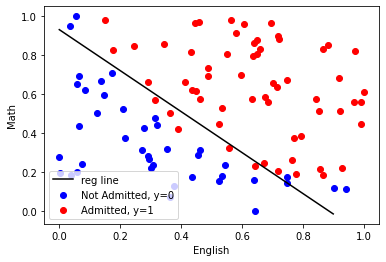

In [63]:
plot_reg(X, y, beta)

In [12]:
def plot_reg(X, y, beta): 
    ''' 
    function to plot decision boundary 
    '''
    # labelled observations 
    x_0 = X[np.where(y == 0.0)] 
    x_1 = X[np.where(y == 1.0)] 
      
    # plotting points with diff color for diff label 
    plt.scatter([x_0[:, 1]], [x_0[:, 2]], c='b', label='Not Admitted, y=0') 
    plt.scatter([x_1[:, 1]], [x_1[:, 2]], c='r', label='Admitted, y=1') 
      
    # plotting decision boundary 
    x1 = np.arange(0, 1, 0.1) 
    x2 = -(beta[0,0] + beta[0,1]*x1)/beta[0,2] 
    plt.plot(x1, x2, c='k', label='reg line') 
    plt.xlabel('English') 
    plt.ylabel('Math') 
    plt.legend() 
    plt.show() 

In [2]:
def logistic_sigmoid_func(beta, X): 
    return 1.0/(1 + np.exp(-np.dot(X, beta.T))) 

In [65]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score 
model = LogisticRegression()
model.fit(X, y)
predicted_classes = model.predict(X)
accuracy = accuracy_score(y.flatten(),predicted_classes)
parameters = model.coef_

In [66]:
print("Accuracy is:", accuracy)

Accuracy is: 0.93
